# Problem Statement

# Analysis of Ad-Hoc Communications Network

You have been asked to help with planning an ad-hoc communications network over a large rectangular region. Each individual tower can monitor a rectangular subsection of a specific width and height. The main problem is that none of the individual towers can provide coverage for the entire region of interest. Communications towers are unreliable and are put up independently and at random. You have no control over where or how big a tower’s footprint is placed. Importantly, due to technical issues such as cross-talk, no individual rectangular subsection can have multiple towers providing coverage for it. That is, there can be no overlap between any pair of rectangular subsections provided by the two respective towers. In any case, the desire is to maximize the coverage area of any available communications tower.

The order of when the towers come online is important. Once a tower has acquired its rectangular section, no subsequent tower can overlap that section. You may assume the following for this problem:

* All rectangular sections have integer-based corners.
* All rectangular sections must be contained in the overall rectangular footprint.
* The height and width of each rectangular section is sampled from a uniform distribution.
* Positions of the windows are also determined by uniform random distribution.
* All footprints must be rectangles (not general polygons).
* When a new tower comes online, if its coverage rectangle intersects the pre-existing composite footprint, then that new tower’s coverage is trimmed such that its maximum remaining coverage area is retained.

Write a detailed Jupyter notebook that implements a solution to this problem such that the user can supply the following overall size of desired coverage footprint and then determine the following:

* Given an overall desired coverage footprint and a sequence of n communications towers, what is the resulting resolved coverage?
* What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?
* On average, how many communications towers are required before full coverage is obtained?


# Import

### Required External Module
* numpy
* matplotlib 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp

import copy
import random
import warnings

# Define Class

##### This part of code has been moved to one separate python script ```Region_Class.py```, import is needed.

In [2]:
from Region_Class import Region

# Basic Example

##### This part will show you how to use the Region class

Build the object, define the size yourself

In [3]:
net = Region(9,9)

##### Add operation (Maximal Rectangle Detection included)

Tower position is defined as ```bottom left point``` of one unit rectangle area

##### The size of subsection for this tower is also needed

params:
    ```(x_tower, y_tower, size_x, size_y)```

Detailed description:
     x_tower, y_tower: The position of new tower
     
     size_x, size_y: define size of rectangular area
     
     show_overlap: bool (optional) decide whether to show overlap plot or not (default: False)
                
     text: bool (optional) decide whether to show text or not (default: False)

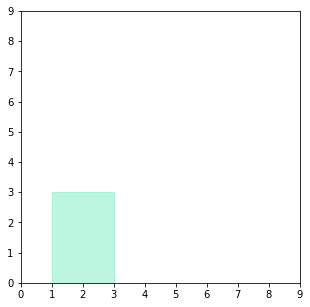

In [4]:
net.add_tower(1,0,2,3)
net.show_map()

##### Add another tower (No overlap situation)

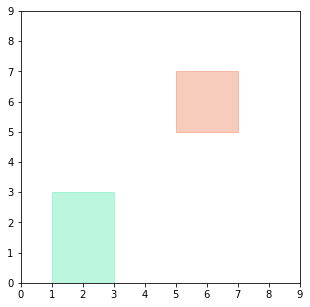

In [5]:
net.add_tower(5,5,2,2)
net.show_map()

##### Add another tower (Overlap Situation)

The new Rectangle area will be trimmed automatically

Trimming algorithm:

    Find max blank rectangular area for trimming. Similar to Leetcode #85 problem.
        
    Steps:
    
        For each line of self.map:
        
            1. Build histogram of blank area for each column.
            
            2. Calc maximal rectangle area in histogram 
            
               (Similar to Leetcode #84 problem, finished by largest_hist_area(hist) function)
               
            3. Save the maximal area value and position.
            
        Finally get the maximal subrectangle area for all rows and its position.
        
    The detailed coding process is available in Region_Class.py

##### NOTE: If you want to observe the whole trim process, make sure to set show_overlap = True.

show_overlap will make no output and you need to use show_map() function in the class to check the map.

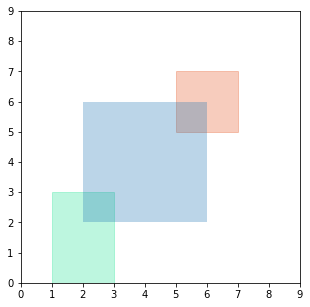

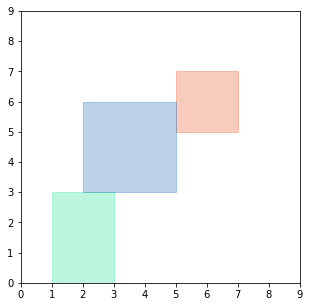

In [6]:
net.add_tower(2,2,4,4,show_overlap=True)

##### You can also use some helpful functions to: 

* check the current number of towers with effective sub-rectangle area 
* check the current number of covered area

In [7]:
print("Number of tower = " + str(net.get_tower_num()))
print("Covered area = " + str(net.get_cover_area()))

Number of tower = 3
Covered area = 19


##### Use the reset_map function to clean up the current Region if you need

Number of tower = 0
Covered area = 0


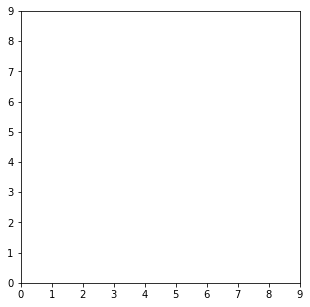

In [8]:
net.reset_map()
net.show_map()
print("Number of tower = " + str(net.get_tower_num()))
print("Covered area = " + str(net.get_cover_area()))

# Automatic Example

##### The Region class also supports the auto add tower process and even the function for massive times of experiments

##### This part will show you how to use these functions

##### Initially define the network object

In [9]:
net = Region(6,10)

##### Start the auto fill process

params:
    ```(max_try, limit_num_towers, desired_cover, show_overlap_process, show_text)```
    
Detailed Description:

    max_try: int > 0, max number of random generating during one experiment

    limit_num_towers: int > 0, number of towers given

    desired_cover: int > 0 and <= self.max_coverage

    show_overlap_process: bool (optional) decide whether to show overlap plot or not (default = Flase)

    show_text: bool (optional) decide whether to show text or not (default = Flase)
            
return:

    try_count: int, number of generating towers in one auto_fill process

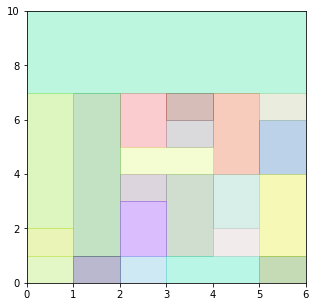

In [10]:
net.auto_fill(999,60,60) # 60 is full-covered situation for this 6 * 10 region network
net.show_map()

In [11]:
print("Number of tower = " + str(net.get_tower_num()))
print("Covered area = " + str(net.get_cover_area()))

Number of tower = 22
Covered area = 60


##### Optional: 

make text = True to show the index of trial for each subrectangle area

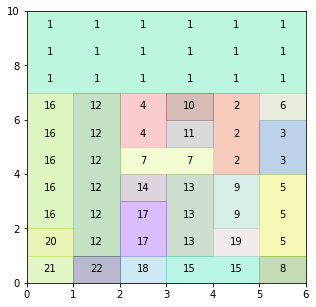

In [12]:
net.show_map(text=True)

##### Optional

If you need to plot the whole process includes trimming, please set ```show_overlap = True```

##### If you set ```show_overlap = True```, a lot of picture to show the whole process will be printed

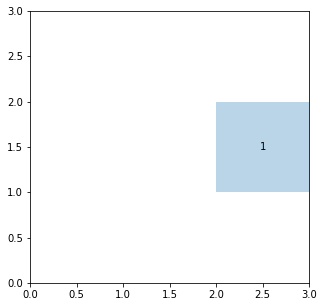

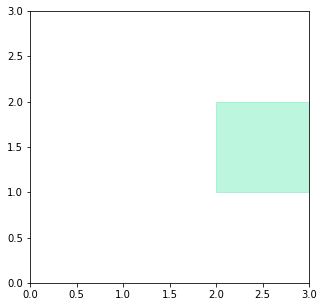

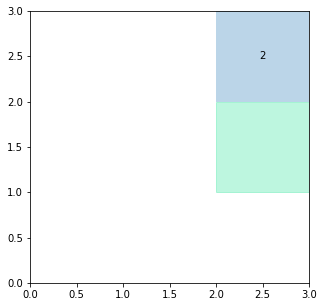

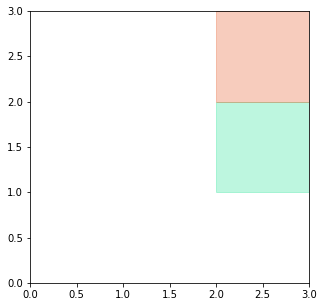

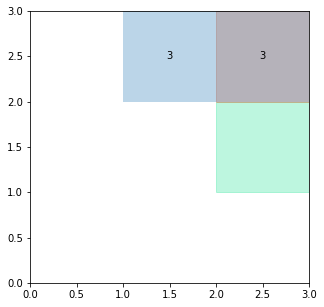

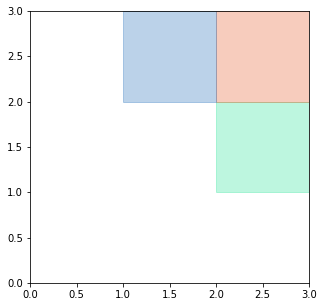

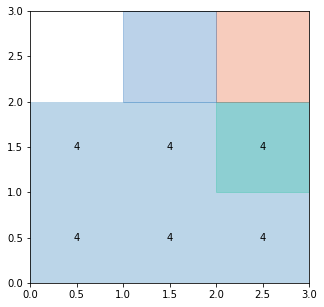

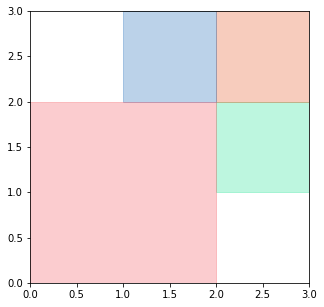

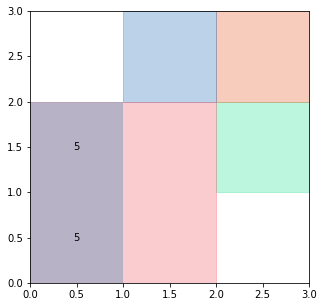

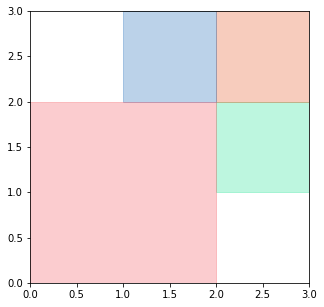

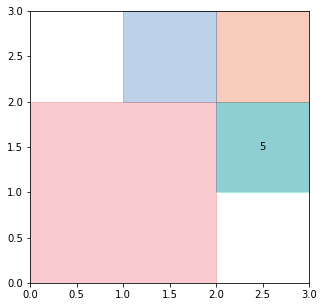

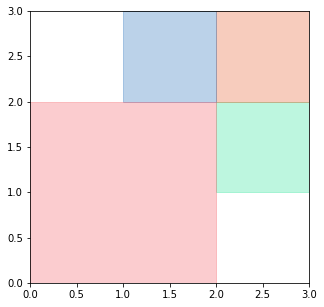

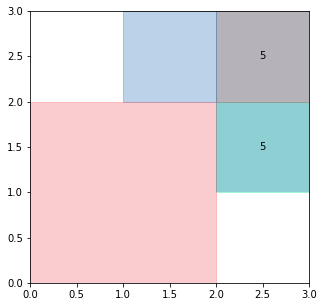

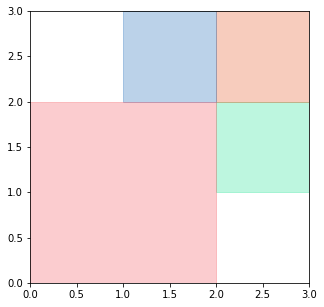

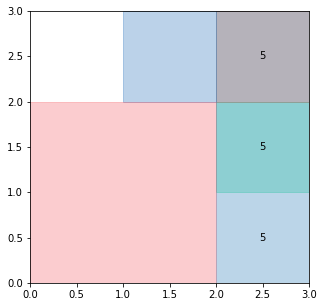

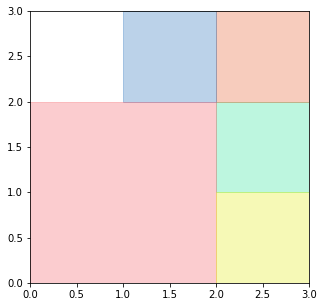

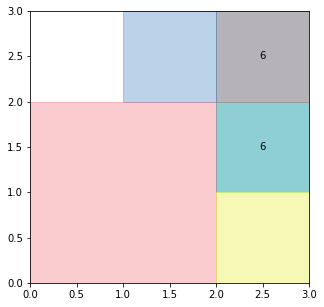

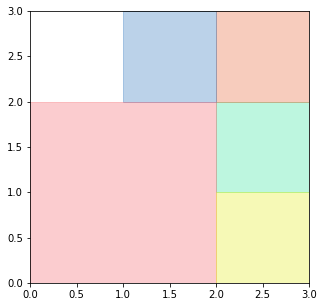

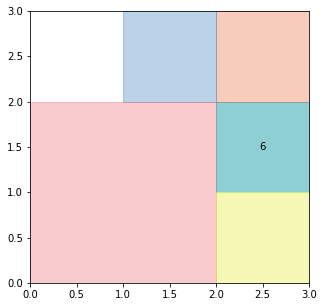

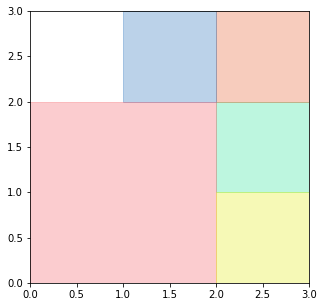

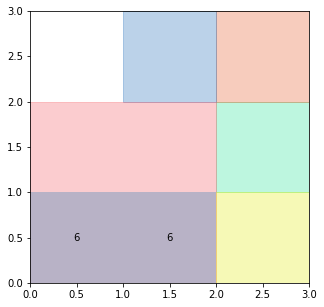

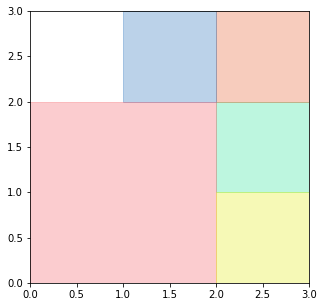

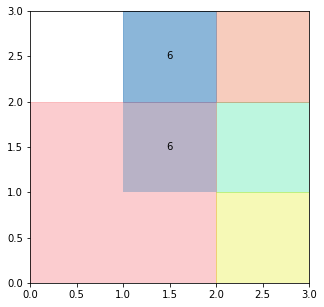

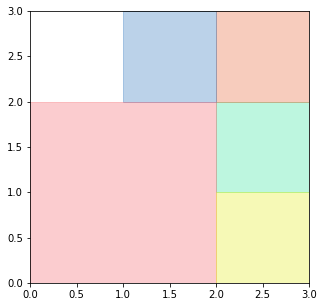

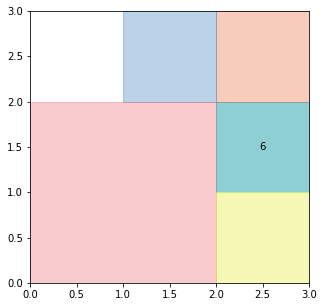

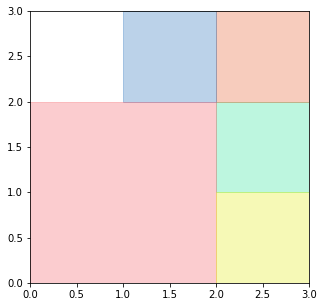

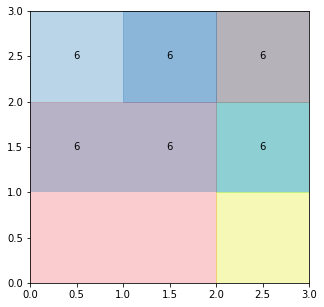

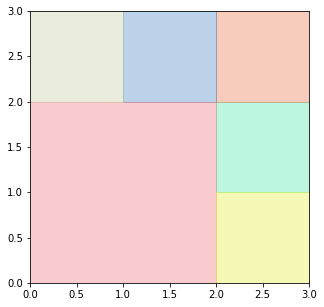

15

In [13]:
net = Region(3,3)
net.reset_map()
net.auto_fill(999,9,9,show_overlap_process=True,show_text=True)

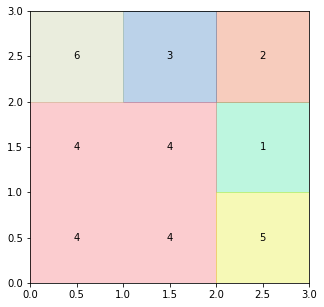

Number of tower = 6
Covered area = 9


In [14]:
net.show_map(text=True)
print("Number of tower = " + str(net.get_tower_num()))
print("Covered area = " + str(net.get_cover_area()))

# Analysis Problem

## Problem 1

##### Given an overall desired coverage footprint and a sequence of n communications towers, what is the resulting resolved coverage?

##### For example, if n=5, one auto_fill process can be initialized. 

##### Due to the randomly generated process for new tower, the final resolved coverage can be different for different trials.

##### Try to run the following cell several times, you will get different results.

##### (For example, let's set the region to be ```10 * 10``` area and the number of towers to be 5)

In [15]:
net = Region(10,10)

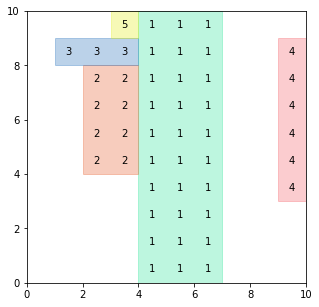

Final Coverage = 48


In [16]:
net.reset_map()
net.auto_fill(9999,5,100)
net.show_map(text=True)
print("Final Coverage = "+str(net.get_cover_area()))

## Problem 2

##### What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?

##### For this 10 * 10 area, for example, let's study the situation for n = 1 ~ 30, auto_fill 100 times for each value of n to get statistical average coverage. The experiment for these situations may take some time.

##### In order to do this experiment, the batch_experiment function of Region class is needed.

params:  ```(n_exp, try_limit, tower_limit, desired_cover)```
        
Detailed Description:

    n_exp: int > 0 (number of experiment)

    try_limit: int > 0 (limitation for times of tower generation in each experiment)

    tower_limit: int > 0 (limitation for number of towers in the map of each experiment)

    desired_cover: int > 0 and <= self.max_coverage (user-defined desired coverage)

Return: ```(num_try_record, num_tower_record, coverage_record)```

    num_try_record: list (contains times of generating towers in the map of each experiment)
    
    num_tower_record: list (contains final number of towers in the map of each experiment)

    coverage_record: list (contains final coverage in map of each experiment)
    

In [17]:
average_coverage = []
for n in range(1,50+1):
    net.reset_map()
    exp_result = net.batch_experiment(100, 999, n, 100)
    coverage_result = exp_result[2]
    average_coverage.append(sum(coverage_result)/len(coverage_result))

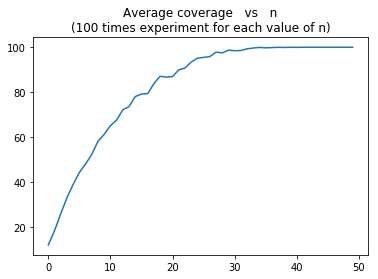

In [18]:
plt.figure()
plt.title("Average coverage   vs   n\n(100 times experiment for each value of n)")
plt.plot(average_coverage)
plt.show()

##### From the plot above, it can be observed that when n>=30, the average coverage of 100 experiments for n towers can reach full-coverage.

## Problem 3

##### On average, how many communications towers are required before full coverage is obtained?

##### Let's run 1000 times experiment for the full coverage on different size of network (1 x 1 ~ 10 x 10).

##### This experiment may take some time.

In [19]:
average_result = []
for size in range(1,11):
    net = Region(size,size)
    net.reset_map()
    exp_result = net.batch_experiment(1000,999,size*size,size*size)
    num_tower_record = exp_result[1]
    average_result.append(sum(num_tower_record)/len(num_tower_record))

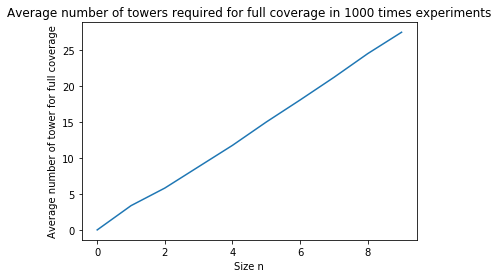

In [20]:
plt.figure()
plt.title("Average number of towers required for full coverage in 1000 times experiments")
plt.xlabel("Size n")
plt.ylabel("Average number of tower for full coverage")
plt.plot(average_result)
plt.show()

##### It can be observed that ```the average number of towers required for full coverage``` and ```the size n for n x n networks``` have ```linear``` relationship.

# Trade-off and Limitations

The tower's position ans its subrectangle area is generated randomly based on uniform distribution. The code implemented is able to reproduce this process and find the final resolved situation for the tower and subrectangle in the cummunication network. However, with the increase of size of network, the calculation time required will growth.

The algorithm implemented in Region_Class.py to find maximal balnk area is combined the row search process and algorithm for finding maximal rectangle area in histogram. The required calculation is huge. In addition, as for the three specific problem. we have to run multiple times of experiments to get the average performance of this fully randomly generated process and then obtain the final test result. This also requires lots of calculation time.